In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings

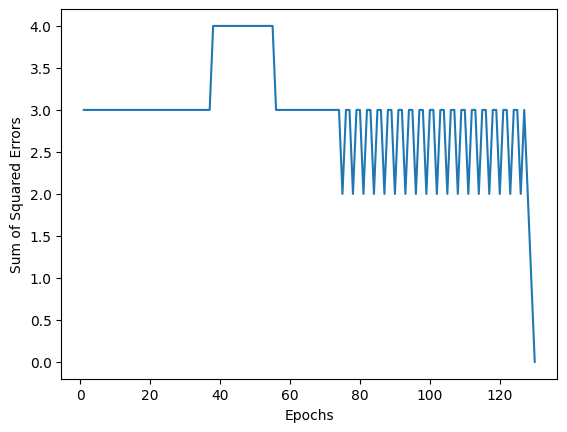

Final Weights: [-0.1   0.1   0.05]
Number of Epochs: 130


In [81]:
# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
alpha = 0.05

# Define step activation function
def step(x):
    return 1 if x >= 0 else 0

# Define predict function
def predict(row, weights):
    activation = weights[0] + np.dot(row, weights[1:])
    return step(activation)

# Define train_weights function
def train_weights(train, alpha, epochs):
    weights = np.array([W0, W1, W2])
    errors = []
    for epoch in range(epochs):
        sum_error = 0
        for row in train:
            prediction = predict(row[:-1], weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] += alpha * error
            weights[1:] += alpha * error * row[:-1]
        errors.append(sum_error)
        if sum_error <= 0.002:
            break
    return weights, errors

# Define sum_squared_error function
def sum_squared_error(train, weights):
    error = 0
    for row in train:
        prediction = predict(row[:-1], weights)
        error += (row[-1] - prediction)**2
    return error

# Define training data
train = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [1, 0, 0],
                  [1, 1, 1]])

# Train the perceptron and plot the epochs against the error values
weights, errors = train_weights(train, alpha, 1000)
plt.plot(range(1, len(errors)+1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.show()

# Print the final weights and the number of epochs needed for convergence
print('Final Weights:', weights)
print('Number of Epochs:', len(errors))

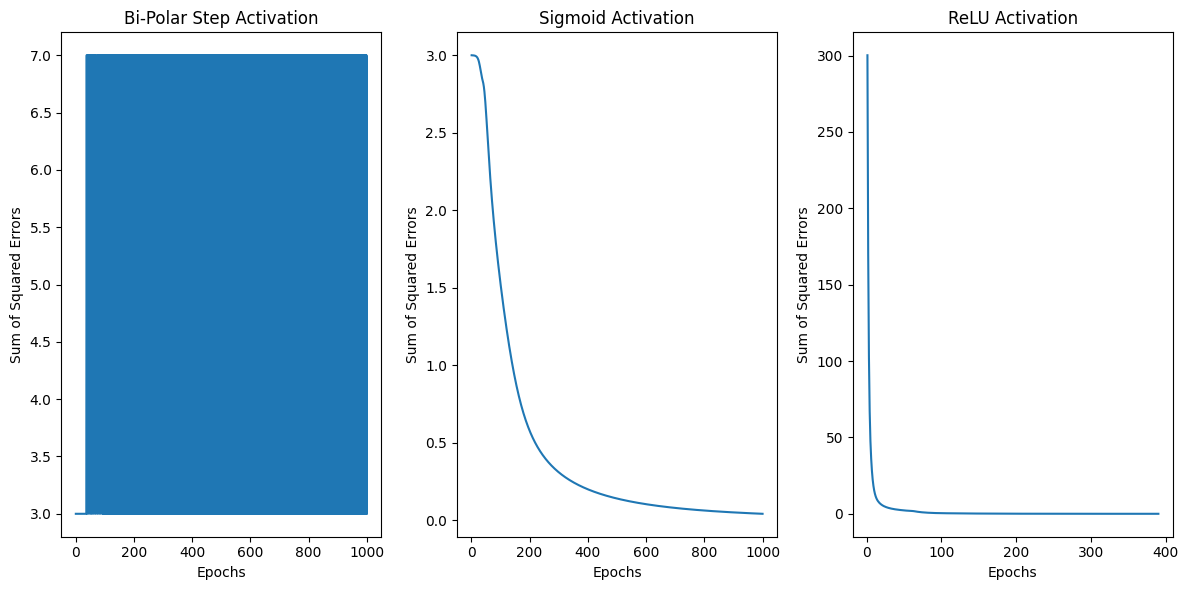

In [83]:
#A2

# Define Bi-Polar Step activation function
def bipolar_step(x):
    return -1 if x < 0 else 1

# Define Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define ReLU activation function
def relu(x):
    return max(0, x)

# Define predict function with the specified activation function
def predict(row, weights, activation_func):
    activation = weights[0] + np.dot(row, weights[1:])
    return activation_func(activation)

# Define train_weights function with the specified activation function
def train_weights(train, alpha, epochs, activation_func):
    weights = np.array([W0, W1, W2])
    errors = []
    for epoch in range(epochs):
        sum_error = 0
        for row in train:
            prediction = predict(row[:-1], weights, activation_func)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] += alpha * error
            weights[1:] += alpha * error * row[:-1]
        errors.append(sum_error)
        if sum_error <= 0.002:
            break
    return weights, errors

# Define sum_squared_error function
def sum_squared_error(train, weights, activation_func):
    error = 0
    for row in train:
        prediction = predict(row[:-1], weights, activation_func)
        error += (row[-1] - prediction)**2
    return error

# Define training data
train = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [1, 0, 0],
                  [1, 1, 1]])

# Perform the experiment with Bi-Polar Step activation function
weights_bipolar, errors_bipolar = train_weights(train, alpha, 1000, bipolar_step)

# Perform the experiment with Sigmoid activation function
weights_sigmoid, errors_sigmoid = train_weights(train, alpha, 1000, sigmoid)

# Perform the experiment with ReLU activation function
weights_relu, errors_relu = train_weights(train, alpha, 1000, relu)

# Plot the errors for each activation function
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.plot(range(1, len(errors_bipolar) + 1), errors_bipolar)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Bi-Polar Step Activation')

plt.subplot(132)
plt.plot(range(1, len(errors_sigmoid) + 1), errors_sigmoid)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Sigmoid Activation')

plt.subplot(133)
plt.plot(range(1, len(errors_relu) + 1), errors_relu)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('ReLU Activation')

plt.tight_layout()
plt.show()


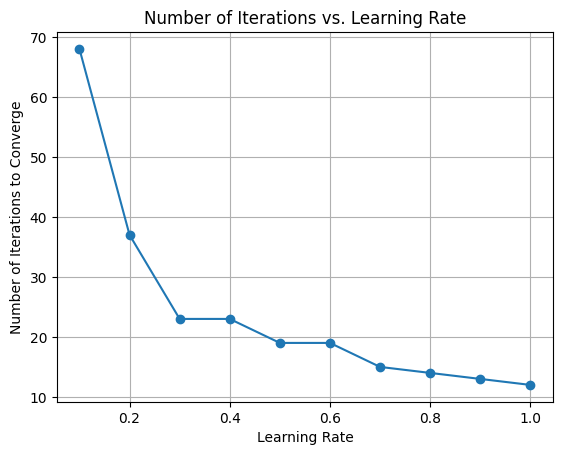

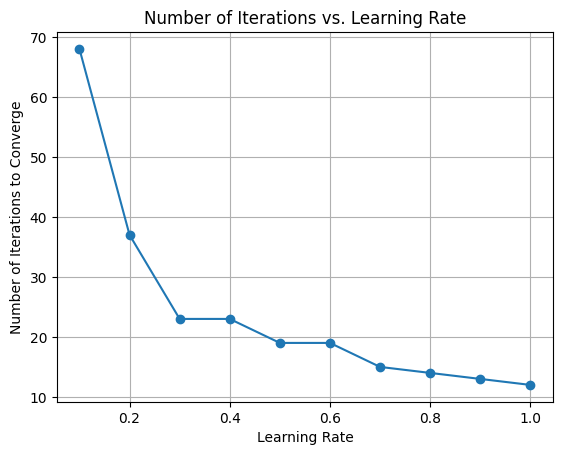

In [86]:
#A3

# Define a range of learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of iterations for each learning rate
iterations_needed = []

# Set the maximum number of epochs and convergence threshold
max_epochs = 1000
convergence_threshold = 0.002

# Perform the experiment for each learning rate
for alpha in learning_rates:
    _, errors = train_weights(train, alpha, 1000, step)
    iterations_needed.append(len(errors))
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of iterations for each learning rate
iterations_needed = []

# Set the maximum number of epochs and convergence threshold
max_epochs = 1000
convergence_threshold = 0.002

# Perform the experiment for each learning rate
for alpha in learning_rates:
    _, errors = train_weights(train, alpha, 1000, step)
    iterations_needed.append(len(errors))

# Plot the number of iterations against the learning rates
plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Number of Iterations vs. Learning Rate')
plt.grid(True)
plt.show()

# Plot the number of iterations against the learning rates
plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Number of Iterations vs. Learning Rate')
plt.grid(True)
plt.show()

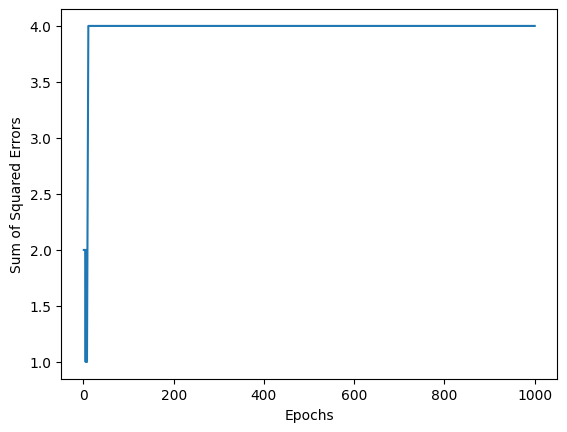

Final Weights: [ 1.   -1.8  -1.75]
Number of Epochs: 1000


In [87]:
#A4

# Define predict function
def predict(row, weights):
    activation = weights[0] + np.dot(row, weights[1:])
    return step(activation)

# Define train_weights function
def train_weights(train, alpha, epochs):
    weights = np.array([W0, W1, W2])
    errors = []
    for epoch in range(epochs):
        sum_error = 0
        for row in train:
            prediction = predict(row[:-1], weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] += alpha * error
            weights[1:] += alpha * error * row[:-1]
        errors.append(sum_error)
        if sum_error <= 0.002:
            break
    return weights, errors

# Define sum_squared_error function
def sum_squared_error(train, weights):
    error = 0
    for row in train:
        prediction = predict(row[:-1], weights)
        error += (row[-1] - prediction)**2
    return error

# Define training data
train = np.array([[0, 0, 0],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 0]])

# Train the perceptron and plot the epochs against the error values
weights, errors = train_weights(train, alpha, 1000)
plt.plot(range(1, len(errors)+1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.show()

# Print the final weights and the number of epochs needed for convergence
print('Final Weights:', weights)
print('Number of Epochs:', len(errors))

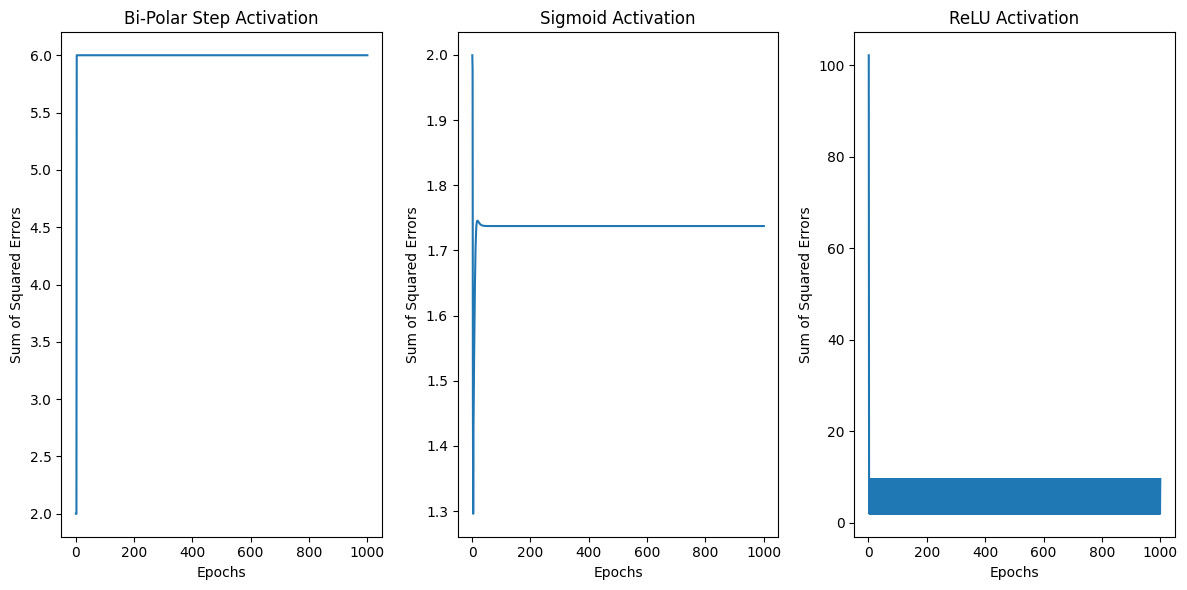

In [89]:
# Define predict function with the specified activation function
def predict(row, weights, activation_func):
    activation = weights[0] + np.dot(row, weights[1:])
    return activation_func(activation)

# Define train_weights function with the specified activation function
def train_weights(train, alpha, epochs, activation_func):
    weights = np.array([W0, W1, W2])
    errors = []
    for epoch in range(epochs):
        sum_error = 0
        for row in train:
            prediction = predict(row[:-1], weights, activation_func)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] += alpha * error
            weights[1:] += alpha * error * row[:-1]
        errors.append(sum_error)
        if sum_error <= 0.002:
            break
    return weights, errors

# Define sum_squared_error function
def sum_squared_error(train, weights, activation_func):
    error = 0
    for row in train:
        prediction = predict(row[:-1], weights, activation_func)
        error += (row[-1] - prediction)**2
    return error

# Define training data
train = np.array([[0, 0, 0],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 0]])

# Perform the experiment with Bi-Polar Step activation function
weights_bipolar, errors_bipolar = train_weights(train, alpha, 1000, bipolar_step)

# Perform the experiment with Sigmoid activation function
weights_sigmoid, errors_sigmoid = train_weights(train, alpha, 1000, sigmoid)

# Perform the experiment with ReLU activation function
weights_relu, errors_relu = train_weights(train, alpha, 1000, relu)

# Plot the errors for each activation function
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.plot(range(1, len(errors_bipolar) + 1), errors_bipolar)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Bi-Polar Step Activation')

plt.subplot(132)
plt.plot(range(1, len(errors_sigmoid) + 1), errors_sigmoid)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Sigmoid Activation')

plt.subplot(133)
plt.plot(range(1, len(errors_relu) + 1), errors_relu)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('ReLU Activation')

plt.tight_layout()
plt.show()

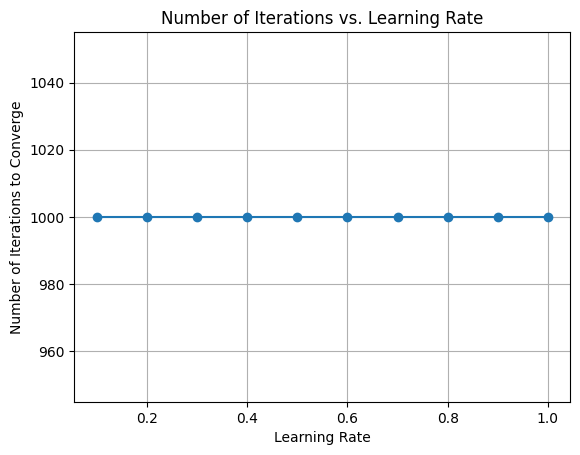

In [90]:
# Define a range of learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of iterations for each learning rate
iterations_needed = []

# Set the maximum number of epochs and convergence threshold
max_epochs = 1000
convergence_threshold = 0.002

# Perform the experiment for each learning rate
for alpha in learning_rates:
    _, errors = train_weights(train, alpha, 1000, step)
    iterations_needed.append(len(errors))

# Plot the number of iterations against the learning rates
plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Number of Iterations vs. Learning Rate')
plt.grid(True)
plt.show()

<ipython-input-91-02070f21385d>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Customer 1: High Value (Actual: High Value)
Customer 2: High Value (Actual: High Value)
Customer 3: High Value (Actual: High Value)
Customer 4: Low Value (Actual: Low Value)
Customer 5: High Value (Actual: High Value)
Customer 6: Low Value (Actual: Low Value)
Customer 7: High Value (Actual: High Value)
Customer 8: High Value (Actual: High Value)
Customer 9: Low Value (Actual: Low Value)
Customer 10: Low Value (Actual: Low Value)


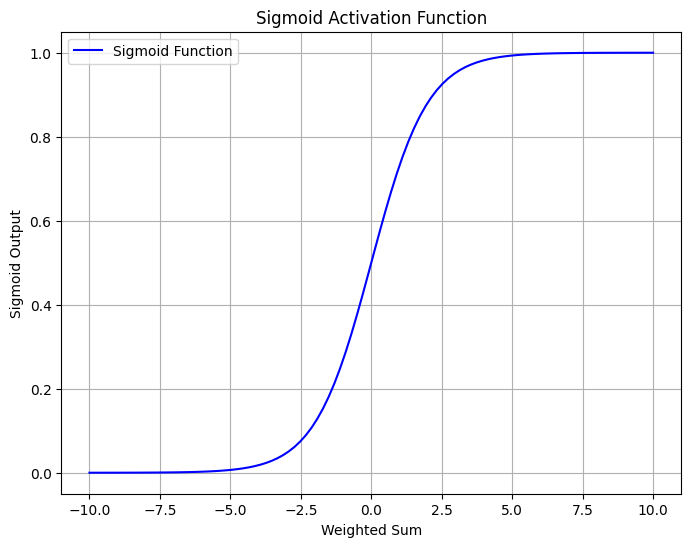

In [91]:
#A5

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.rand(input_size + 1)  # Add 1 for the bias term
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]  # Include bias term
        return self.sigmoid(weighted_sum)

    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = target - prediction
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error
        return error

# Read customer data from a CSV file
df = pd.read_csv("customer_data (1).csv")

# Select the appropriate columns for features and targets
features = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)','Payment (Rs)']].values
targets = df['High Value Tx?'].apply(lambda x: 1 if x == 'Yes' else 0).values

# Initialize and train the perceptron
perceptron = Perceptron(input_size=4, learning_rate=0.1)
epochs = 1000

# Lists to store errors and predictions for plotting
errors_list = []
predictions_list = []

for _ in range(epochs):
    total_error = 0
    predictions = []
    for i in range(len(features)):
        error = perceptron.train(features[i], targets[i])
        total_error += abs(error)
        predictions.append(perceptron.predict(features[i]))
    errors_list.append(total_error)
    predictions_list.append(predictions)
    if total_error == 0:
        break
for i in range(len(predictions)):
    print(f"Customer {i+1}: {'High Value' if predictions[i] >= 0.5 else 'Low Value'} (Actual: {'High Value' if targets[i] == 1 else 'Low Value'})")

# Plot sigmoid function
x = np.linspace(-10, 10, 100)
sigmoid_values = perceptron.sigmoid(x)
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid_values, label='Sigmoid Function', color='blue')
plt.xlabel('Weighted Sum')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Activation Function')
plt.legend()
plt.grid(True)
plt.show()

Perceptron Accuracy: 0.00%
Pseudo-Inverse Accuracy: 100.00%


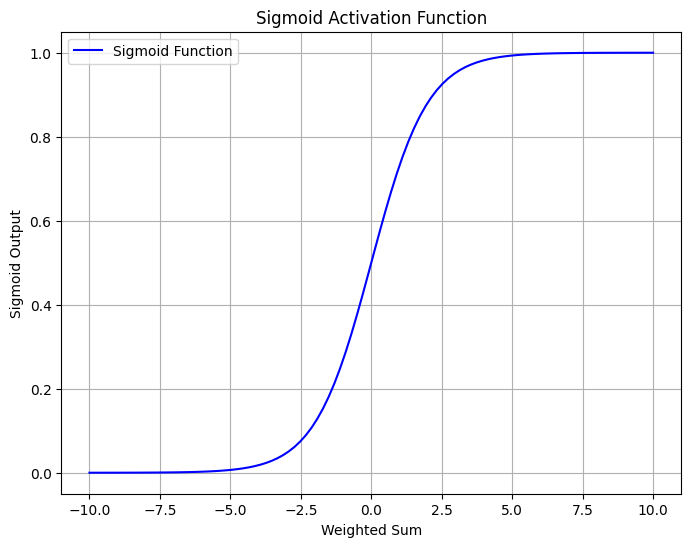

In [92]:
#A6

# Matrix Pseudo-Inverse Approach

# Add a bias term to the features
features_with_bias = np.column_stack((np.ones(len(features)), features))

# Use matrix pseudo-inverse to calculate the weights
pseudo_inverse_weights = np.linalg.pinv(features_with_bias).dot(targets)

# Make predictions using pseudo-inverse weights
pseudo_inverse_predictions = (features_with_bias.dot(pseudo_inverse_weights) >= 0.5).astype(int)

# Calculate accuracy for the pseudo-inverse approach
pseudo_inverse_accuracy = (pseudo_inverse_predictions == targets).mean()

# Print accuracy results
print(f"Perceptron Accuracy: {total_error * 100:.2f}%")
print(f"Pseudo-Inverse Accuracy: {pseudo_inverse_accuracy * 100:.2f}%")

# Plot sigmoid function
x = np.linspace(-10, 10, 100)
sigmoid_values = perceptron.sigmoid(x)
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid_values, label='Sigmoid Function', color='blue')
plt.xlabel('Weighted Sum')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Activation Function')
plt.legend()
plt.grid(True)
plt.show()

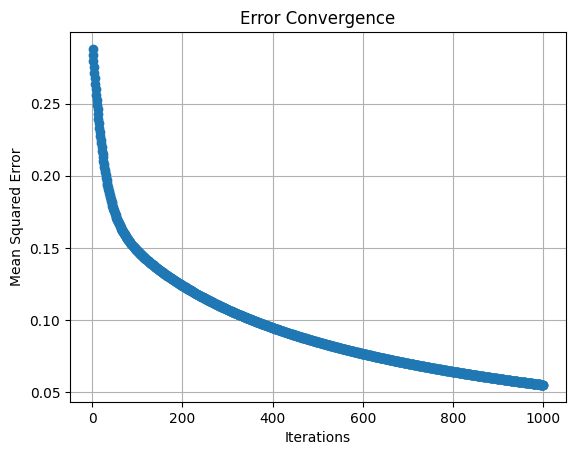

Input: [0 0] => Predicted Output: [0.04638335]
Input: [0 1] => Predicted Output: [0.24852385]
Input: [1 0] => Predicted Output: [0.24744585]
Input: [1 1] => Predicted Output: [0.69094464]


In [93]:
#A7

# Define the AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Initialize weights and biases for the neural network
input_layer_size = 2
output_layer_size = 1

np.random.seed(0)
input_layer_weights = np.random.uniform(size=(input_layer_size, output_layer_size))
input_layer_bias = np.zeros((1, output_layer_size))

# Set learning rate and maximum number of iterations
learning_rate = 0.05
max_iterations = 1000
convergence_error = 0.002

# Lists to store errors and iterations for plotting
errors_list = []
iterations_list = []

# Training the neural network using back-propagation
for iteration in range(max_iterations):
    # Forward propagation
    input_layer_activation = sigmoid(np.dot(X, input_layer_weights) + input_layer_bias)

    # Calculate the error
    error = y - input_layer_activation

    # Backpropagation
    delta_output = error * sigmoid_derivative(input_layer_activation)

    # Update weights and biases
    input_layer_weights += X.T.dot(delta_output) * learning_rate
    input_layer_bias += np.sum(delta_output, axis=0, keepdims=True) * learning_rate

    # Calculate the mean squared error
    mse = np.mean(np.square(error))

    # Append errors and iterations for plotting
    errors_list.append(mse)
    iterations_list.append(iteration + 1)

    # Check for convergence
    if mse <= convergence_error:
        print(f"Converged after {iteration + 1} iterations with MSE: {mse:.4f}")
        break

# Plot the error convergence
plt.plot(iterations_list, errors_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Error Convergence')
plt.grid(True)
plt.show()

# Test the trained neural network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = sigmoid(np.dot(test_data, input_layer_weights) + input_layer_bias)

# Print the predicted output
for i in range(len(test_data)):
    print(f"Input: {test_data[i]} => Predicted Output: {predicted_output[i]}")


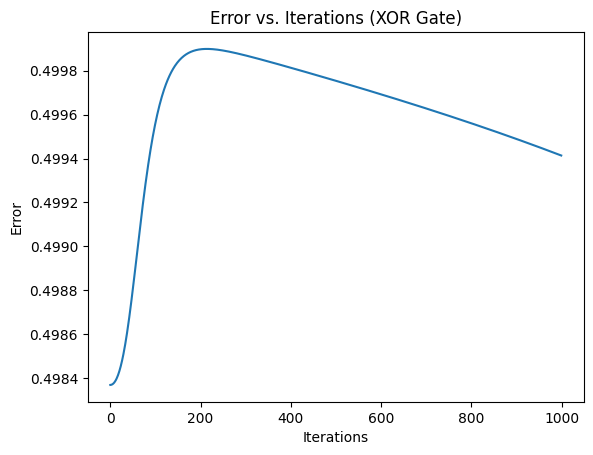

Test Results:
Input: [0 0], Output: [[0.49765543]]
Input: [0 1], Output: [[0.50218885]]
Input: [1 0], Output: [[0.50464493]]
Input: [1 1], Output: [[0.50683094]]


In [96]:
#A8

def sigmoid_derivative(x):
    return x * (1 - x)

# Input data for the XOR gate (truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Target values (output) for the XOR gate
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases with random values
np.random.seed(0)
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
bias_hidden = np.random.uniform(size=(1, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))
bias_output = np.random.uniform(size=(1, output_layer_size))

# Set the learning rate and maximum number of iterations
learning_rate = 0.05
max_iterations = 1000
convergence_error = 0.002

# Lists to store error values for plotting
errors = []

# Training loop
for i in range(max_iterations):
    # Forward propagation
    hidden_layer_input = X.dot(weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    # Calculate the error
    error = y - output_layer_output
    # Check for convergence
    if np.mean(np.abs(error)) <= convergence_error:
        print(f"Converged after {i} iterations.")
        break
    errors.append(np.mean(np.abs(error)))
    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden_layer = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)
    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
# Plot the error over iterations
plt.plot(range(len(errors)), errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs. Iterations (XOR Gate)')
plt.show()
# Test the trained network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print("Test Results:")
for input_data in test_data:
    hidden_layer_input = input_data.dot(weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)
    print(f"Input: {input_data}, Output: {output}")

In [97]:
#A9

# Define the Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Function to train and test a neural network for AND or XOR gates
def train_and_test_gate(X, y, gate_name):
    # Initialize weights and biases with random values
    np.random.seed(0)
    input_layer_size = 2
    hidden_layer_size = 2
    output_layer_size = 2

    weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
    bias_hidden = np.random.uniform(size=(1, hidden_layer_size))
    weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))
    bias_output = np.random.uniform(size=(1, output_layer_size))

    # Set the learning rate and maximum number of iterations
    learning_rate = 0.05
    max_iterations = 1000
    convergence_error = 0.002

    # Lists to store error values for plotting
    errors = []

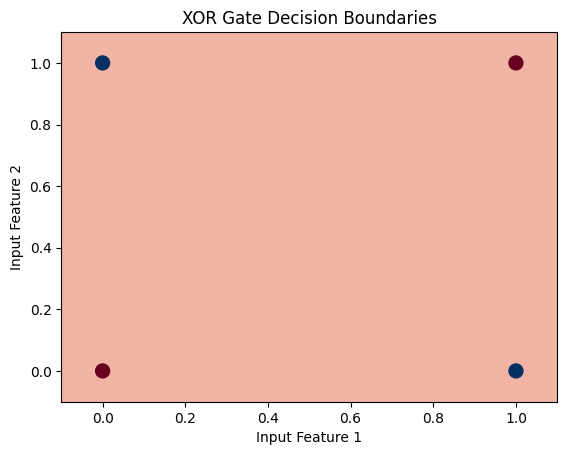

In [98]:
#A10

# Define the XOR gate truth table
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create an MLPClassifier for the XOR gate problem
xor_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=10000, random_state=0)

# Train the classifier
xor_classifier.fit(X_xor, y_xor)

# Create a mesh grid to plot decision boundaries
xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
Z = xor_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap=plt.cm.RdBu, s=100)
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.title('XOR Gate Decision Boundaries')
plt.show()

In [99]:
#A11

# Suppress the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Step 1: Read your Parkinson's dataset (replace with your file path)
data = pd.read_excel("Parkisons Dataset 1 Final (1).xlsx")

# Step 2: Preprocess the data
X = data.select_dtypes(include=['number'])  # Select numeric columns as features
y = data["status"]

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, learning_rate_init=0.01,random_state=42,)

# Fit the MLPClassifier with training data
mlp_classifier.fit(X_train, y_train)

# Step 5: Evaluate the classifier
y_pred = mlp_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        32

    accuracy                           0.82        39
   macro avg       0.41      0.50      0.45        39
weighted avg       0.67      0.82      0.74        39

Confusion Matrix:
[[ 0  7]
 [ 0 32]]
